# ARCH

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from arch import arch_model

path = '../../data/nikkei_from19850104.csv'
df = pd.read_csv(path, index_col=0, parse_dates=True)

In [28]:
df['log_nikkei'] = np.log(df['nikkei'])
df['log_nikkei_diff'] = df['log_nikkei'].diff().fillna(0)

<Axes: xlabel='date', ylabel='log_nikkei_diff'>

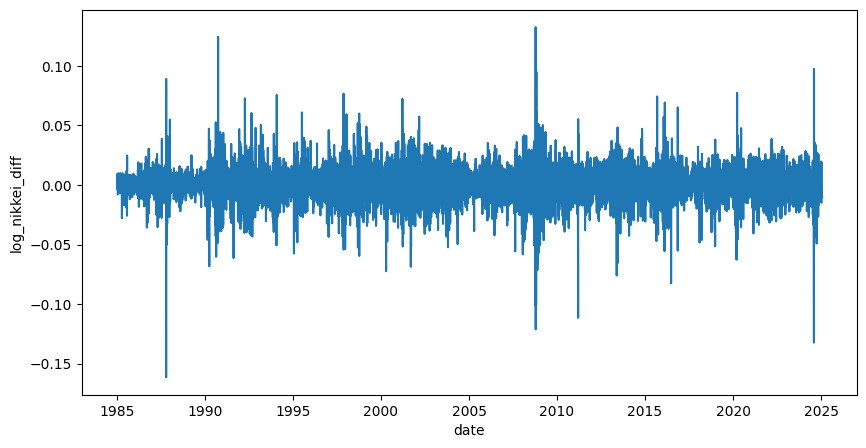

In [30]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=df['log_nikkei_diff'], ax=ax)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 552567.9666898856
Iteration:      2,   Func. Count:     16,   Neg. LLF: 5566332.825110211
Iteration:      3,   Func. Count:     23,   Neg. LLF: 18123.56340853183
Iteration:      4,   Func. Count:     31,   Neg. LLF: 16628.84578729755
Iteration:      5,   Func. Count:     37,   Neg. LLF: 16195.797521396205
Iteration:      6,   Func. Count:     42,   Neg. LLF: 16209.939786881505
Iteration:      7,   Func. Count:     48,   Neg. LLF: 17762.788268882894
Iteration:      8,   Func. Count:     56,   Neg. LLF: 16193.349229266561
Iteration:      9,   Func. Count:     61,   Neg. LLF: 16193.347499501131
Iteration:     10,   Func. Count:     66,   Neg. LLF: 16193.347478446816
Iteration:     11,   Func. Count:     71,   Neg. LLF: 16193.347477902293
Optimization terminated successfully    (Exit mode 0)
            Current function value: 16193.347477902293
            Iterations: 11
            Function evaluations: 71
            Gradient evaluat

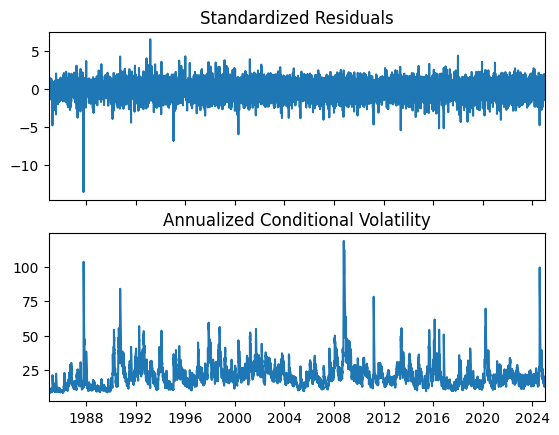

In [38]:
returns = df['log_nikkei_diff'] * 100
model = arch_model(returns, vol='Garch', p=1, q=1)
results = model.fit()
print(results.summary())

fig = results.plot(annualize='D')
plt.show()

In [41]:
forecast_horizon = 10
forecasts = results.forecast(horizon=forecast_horizon)
mean_forecast = forecasts.mean.iloc[-1]
variance_forecast = forecasts.variance.iloc[-1]
volatility_forecast = np.sqrt(variance_forecast)

print(f'1日後の予測平均リターン: {mean_forecast:.4f}')
print(f'1日後の予測ボラティリティ: {volatility_forecast:.4f}')
print(f'ボラティリティ予測: {np.sqrt(variance_forecast):.4f}')

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(volatility_forecast, ax=ax)
plt.show()

TypeError: unsupported format string passed to Series.__format__